In [32]:
from util import get_corpus_text, vis_graph
from build_network import build_network

import networkx as nx

%matplotlib inline

In [2]:
texts, _ = get_corpus_text('Three Months for Semantic Network Experiments', 'MSNBCW')

In [35]:
e = build_network(texts, alpha=0.75)

building PPMI matrix
calculating embedding via randomized SVD
calculating edgeweight matrix


In [52]:
tau = 0.3

A = np.copy(e.edgeweight_mat)
A[A <= tau] = 0.0
A[A > tau] = 1.0

g = nx.from_numpy_matrix(A)

degs = np.flipud(np.sort(np.array(list(g.degree().values()))))

#plt.hist(list(degs.values()), bins=15)

[ 0.0299088   0.02486338  0.01727212  0.01257717  0.00771029  0.0043048
  0.00244005  0.00093238  0.00074722  0.00029757]
[  2.          11.86666667  21.73333333  31.6         41.46666667
  51.33333333  61.2         71.06666667  80.93333333  90.8       ]


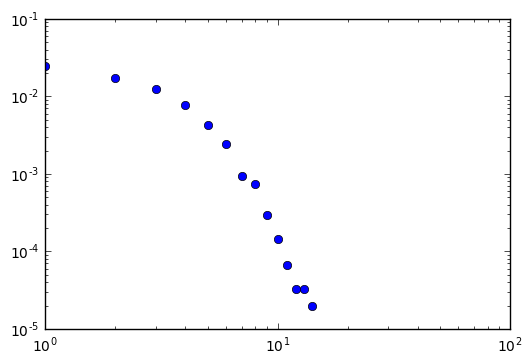

In [111]:
from numpy import histogram

nbins = 15
v, b = histogram(degs, bins=nbins, density=True)

print(v[:10])
print(b[:10])

plt.loglog(v, marker='o', lw=0)

In [112]:
np.mean(degs)

24.398251451686566

In [113]:
print(np.log(v))
np.log(np.arange(nbins) + 1)

[ -3.50960256  -3.69435909  -4.05866184  -4.37587209  -4.86519896
  -5.44802369  -6.01573669  -6.97777344  -7.19914551  -8.11987084
  -8.83549088  -9.62394824 -10.31709542 -10.31709542 -10.82792104]


array([ 0.        ,  0.69314718,  1.09861229,  1.38629436,  1.60943791,
        1.79175947,  1.94591015,  2.07944154,  2.19722458,  2.30258509,
        2.39789527,  2.48490665,  2.56494936,  2.63905733,  2.7080502 ])

In [114]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

logx = np.log10(np.arange(nbins).reshape(-1, 1) + 1)
regr.fit(logx, np.log10(v))

print('Coefficients: \n', regr.coef_, regr.intercept_)
print(regr.predict(logx))
v_predict = np.power(10, regr.predict(logx))

Coefficients: 
 [-3.00697213] -0.58755596815
[-0.58755597 -1.49274478 -2.02224628 -2.39793358 -2.68933929 -2.92743509
 -3.12874222 -3.30312239 -3.4569366  -3.5945281  -3.71899475 -3.8326239
 -3.93715258 -4.03393103 -4.12402961]


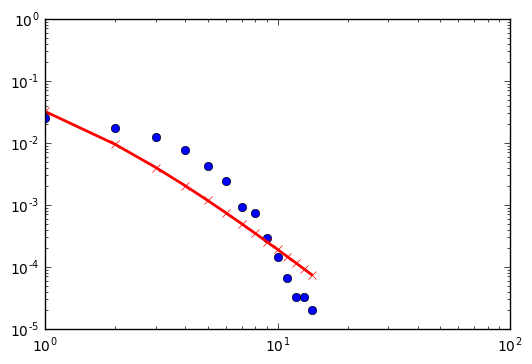

In [115]:
plt.loglog(v, marker='o', lw=0)
plt.loglog(v_predict, marker='x', color='red', lw=2)
plt.show()

on word 0 out of 4
on word 1 out of 4
on word 2 out of 4
on word 3 out of 4


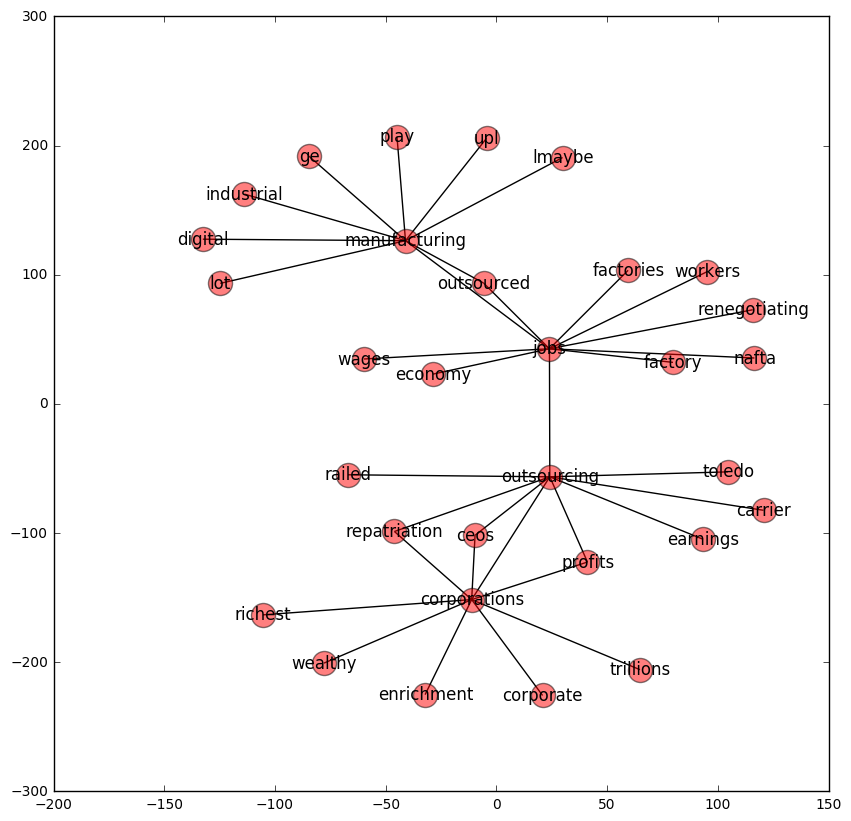

In [116]:
g = e.generate_graph(10, words=['jobs', 'manufacturing', 'outsourcing', 'corporations'])
vis_graph(g, figsize=(10, 10))